# Tutorial about stochastic gene expression using Gillespie algorithm
## From Brownian motion to alterantive HIV treatment


In this tutorial you will learn in detail about ...

### Glossary

> 
Across the tutorial you will encounter <span style="color:blueviolet">**key words** </span> written in <span style="color:red">**bold-red** </span>. The function  <span style="color:blueviolet">**glossary( )** </span> have been created to allow you to search the definition of these words.
> 

### Structure:
> <span style="color:blueviolet">**First section**</span> : short introduction about brownian motion as pardigm of stochatsic process;

> <span style="color:blueviolet">**Second section**</span> : introduction of relevant stochastic event in the cell: transcription & traslation

> <span style="color:blueviolet">**Third section**</span> : differences between **deterministic** & **stochastic** simulations


In [3]:
# from glossary_function import glossary
# (glossary('Brownian motion'))
# print(glossary('Transcriptional bursting'))
# print(glossary('HIV'))

> **"Life is a study in contrasts between <span style="color:blueviolet">randomness</span> and <span style="color:blueviolet">determinism</span>: ** from the chaos of biomolecular interactions to the precise coordination of development, living organisms are able to resolve these two seemingly contradictory aspects of their internal workings." 
>
[Raj & van Oudenaarden, 2008](https://www.sciencedirect.com/science/article/pii/S0092867408012439?via%3Dihub)

### Brownian motion as paradigm of stochastic processes
 
> The discovery of <span style="color:red">**Brownian motion** </span> predates the development of <span style="color:red">**statistical mechanics** </span> and provided important insight to physicists of the early twentieth century in their first formulations of an atomic description of matter. 


 
<img src="Figures/Brownianmotion.gif" style="width: 300px;"/>

> 
>Brownian motion was **discovered** somewhat serendipitously in **1828** by botanist **Robert Brown** while he was studying **pollen** under a microscope. Though many others before him had observed the jittery, random motion of fine particles in a fluid, Brown was the first to catalogue his observations and use them to test hypotheses about the nature of the motion.

>The **first theoretical explanation** of the Brownian motion was given by A. **Einstein** in **1905** who had the idea to look a the problem from a **probabilistic** point of view by discarding all the microscopic details. He interpreted the Brownian motion as coming from the motion of a mesoscopic particle that continuously experiences collisions with the (much smaller) particles of the surrounding fluid. 

>Since then the Brownian Motion has become the **paradigm** of a large class of <span style="color:red">**stochastic ** </span> processes and more generally to the statistical mechanics of non-equilibrium. 

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt # package to make plot
%matplotlib inline
# my functions
#     from glossary_function import glossary
from brownian_function import brownian

## To better grasp the meaning of randomness let's simulate it!

><span style="color:blueviolet">**Below** </span> you can find a model to make a stochastic simulation of Brownian motions. 
>
> A **for loop** is used in order to repeat a number of time the simulation!
>
- <span style="color:blueviolet">**Change** </span> the number of loops (in the cell below) and **observe** the result of multiple simulation using the same combination of parameters.
- Can you <span style="color:blueviolet">**reproduce** </span> the same result (plot)at least twice?

In [25]:
n_loops = 0 # <--- HERE!!

# The Wiener process parameter.
delta = 0.25 #It determins the speed of th process
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = np.empty((2,N+1))
x[:, 0] = 0.0

# --------------------------#

# Plot the 2D trajectory.
hfont = {'fontname':'Georgia'}

for i in range(n_loops):
    
    brownian(x[:,0], N, dt, delta, out=x[:,1:])
    # Plot the trajectory
    plt.plot(x[0],x[1], 'k',label = 'tarjectory')
    plt.xticks([]), plt.yticks([])
    # Mark the start and end points.
    plt.plot(x[0,0],x[1,0], 'g^', label = 'starting point')
    plt.plot(x[0,-1], x[1,-1], 'r^', label = 'end point')
    plt.legend()
    # Other plot specifications
    plt.rc('font', size = (10))
    
    plt.title('2D Brownian Motion',fontsize=16, **hfont)
    plt.xlabel('x', fontsize=16, **hfont), plt.ylabel('y', fontsize=16,  **hfont)
    
    plt.axis('equal')
    plt.grid(True)
    plt.show() 

>"Because such binding events are the result of **random** encounters between molecules, 
some of which are present in **small numbers**, the biochemical processes that regulate transcription initiation are 
inherently **stochastic**" [Kærn et al., 2012](http://collinslab.mit.edu/files/stochasticity%20in%20gene.pdf).
> 


<img src="Figures/What_is_a_burtsy_transcription.png" style="width: 800px;"/>


>"Because such binding events are the result of **random** encounters between molecules, 
some of which are present in **small numbers**, the biochemical processes that regulate transcription initiation are 
inherently **stochastic**" [Kærn et al., 2012](http://collinslab.mit.edu/files/stochasticity%20in%20gene.pdf).
> 

## <span a style="color:blue">**Deterministic** </span> vs <span a style="color:green">**Stochastic** </span> 

> <img src="Figures/analytical_sol.png" alt="Drawing" style="width: 200px; float:left;"/> 
> *****
><span a style="color:blue">**Odinary differential equations (ODEs)** </span>
>
><span a style="color:green">**Master equation** </span>
> *****
> <img src="Figures/numerical_sol.png" alt="Drawing" style="width: 200px; float:left;"/> 
> *****
><span a style="color:blue">**Odinary differential equations (ODEs)** </span>
>
><span a style="color:green">**Gillespie Algorithm** </span>

><span a style="color:blue">**Concetration of molecules** </span>
>
><span a style="color:green">**Number of molecules** </span>
> *****
><span a style="color:blue">**Future is predictable given present knowledge** </span>
>
><span a style="color:green">**Includes randomness: Every simulation is different** </span>
> *****
><span a style="color:blue">**Good for a large number of molecules; qualitative analysis** </span>
>
><span a style="color:green">**Better for simulating dynamics with small numbers of molecules** </span>
> *****
><span a style="color:blue">Represents population **average** </span>
>
><span a style="color:green">Represents population **variability** </span>

###  We will describe  <span a style="color:blueviolet">**minimal model** </span> for bursty trasncription in both <span style="color:red">**deterministic** </span> & <span style="color:red">**stochastic** </span> mathematical model.
<img src="Figures/minimal_burst_model.png" alt="Drawing" style="width: 500px;"/> 

> 
**This model has just 3 parameter!** 
> 

## Let's start with a <span style="color:blueviolet">deterministic </span> model.
###  Calculate analytically the  <span style="color:red">**average** </span> at <span style="color:red">**steady state** </span>
<img src="Figures/average_mRNA.png" alt="Drawing" style="width: 400px;"/> 
> 
<span style="color:blueviolet">**Solve** </span> the equation above and <span style="color:blueviolet">**calculate** </span> the **average** number of mRNA at steady state:
- for k_burst = 10, burst_size = 1, k_deg = 1;
- for k_burst = 100, burst_size = 1, k_deg = 0.1;
- for k_burst = 1, burst_size = 10, k_deg = 1;
> 

In [27]:
## Calculate and print!
#example

answer1 = 123456 #here you calculate
answer2 = 123456 #here you calculate
answer3 = 123456 #here you calculate

print('For k_burst = 10, burst_size = 1, k_deg = 1 the average number of mRNA is ', answer1 , '!')
print() # This empy line is just to space the answers
print('For k_burst = 100, burst_size = 1, k_deg = 0.1 the average number of mRNA is ', answer2 , '!')
print()
print('For k_burst = 1, burst_size = 10, k_deg = 1 the average number of mRNA is ', answer3 , '!')

For k_burst = 10, burst_size = 1, k_deg = 1 the average number of mRNA is  123456 !

For k_burst = 100, burst_size = 1, k_deg = 0.1 the average number of mRNA is  123456 !

For k_burst = 1, burst_size = 10, k_deg = 1 the average number of mRNA is  123456 !


###  Calculate numerically the  <span style="color:red">**average** </span> at <span style="color:red">**steady state** </span>
><span style="color:blueviolet">**odeint( )** </span> is a function that belongs to **scipy.integrate** package and helps **to integrate
** a system of ordinary differential equations.
- <span style="color:blueviolet">**change** </span> the **parameters** in the following command cell;
- <span style="color:blueviolet">****check**** </span> if the **analystical solution** agree with **numerical** one!

In [81]:
# Parameters
k_burst    = 50.0
k_deg      = 1.0
burst_size = 1.0

params = [k_burst,k_deg, burst_size]

# Initial conditions
mRNA_0 = 0
state = (mRNA_0)

# Time
dt = 0.1 # step size!
t = np.arange(0,50,dt)

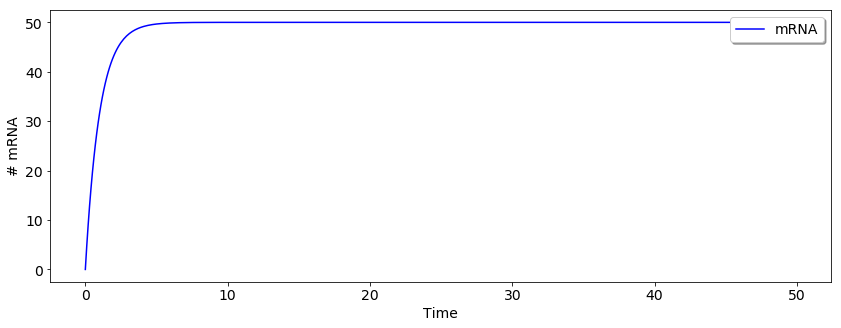

In [82]:
# We define a function ODE system (in format used for odeint)
def ODE(state,t,params):
    
    kb, kd, b_size = params
    
    mRNA           = state

    # rates
    vt             = kb*b_size - kd*mRNA
    
    # equations
    dmRNA_dt       = vt
        
    return (dmRNA_dt)

# Solve using odeint
solution = odeint(ODE,state,t,args=(params,)) 
tmRNA = solution[:,0]

# Show over time
plt.rc('font', size = (14))
plt.figure(figsize=(14,5))
plt.plot(t, tmRNA, 'b-', label='mRNA')
plt.xlabel('Time') , plt.ylabel('# mRNA')
plt.legend(loc='upper right', shadow=True)
plt.show()

# IF you want to save the plot use the following function!
# plt.savefig("myplot.pdf") 

## And now the <span style="color:blueviolet">stochastic </span> counterpart.
#### To do this we need to implement the <span style="color:red">Gillespie algorithm </span>  that is stochastic simulation algorithm (SSA).
#### It is used in probability theory generates a statistically correct <span style="color:red">trajectory </span>  (possible solution) of a stochastic equation.

>It was created by Joseph L. Doob and others (circa 1945), presented by Dan Gillespie in 1976, and popularized in 1977 in a [paper](https://pubs.acs.org/doi/abs/10.1021/j100540a008) where he uses it to simulate chemical or biochemical systems of reactions efficiently and accurately using limited computational power.
#### Canonical steps of this algorithm are the following (math omitted):
><span style="color:blueviolet">**Initialization:** </span> 
>
Initialise the number of molecules in the system, reaction constants, and random number generators.
>
<span style="color:blueviolet">**Monte Carlo step:** </span>
>

>Generate **2 random numbers** to determine the next reaction to occur as well as the time interval. 
> 
The <span style="color:blueviolet">**first** </span> random number is drawn from an **uniform distribution** (between 0-1).
> 
This will allow to choose which reaction will take place in each iteration (bursting or degradation?).
>
**NB!** 
>The probability of a given reaction to be chosen is proportional to the number of substrate molecules.
>
- If the number of mRNA molecules is ZERO also the Probability to degrade them is ZERO!
>
> 
The <span style="color:blueviolet">**second** </span> random number is drawn from an **exponential distribution** in which the parameter  **lambda** is the SUM of the propensities.
>
The time interval is exponentially distributed with mean.
>
<span style="color:blueviolet">**Update:** </span>
>
Increase the time step by the randomly generated time in **Step 2**. Update the molecule count based on the reaction that occurred.
>
<span style="color:blueviolet">**Iterate:** </span>
>
Go back to Step 2 unless the number of reactants is zero or the simulation time has been exceeded.

> Use <span style="color:blueviolet">**Below** </span> you can find the implementation of the Gillespie algorithm <span style="color:blueviolet">**calculate** </span> the **average** number of mRNA at steady state (you can see it from the plot!).
- for k_burst = 10, burst_size = 1, k_deg = 1;
- for k_burst = 100, burst_size = 1, k_deg = 0.1;
- for k_burst = 1, burst_size = 10, k_deg = 1;

<span style="color:blueviolet">**Below** </span> you can find the implementation of the Gillespie algorithm <span style="color:blueviolet">**calculate** </span> the **average** number of mRNA at steady state (you can see it from the plot!).
- for k_burst = 10, burst_size = 1, k_deg = 1;
- for k_burst = 100, burst_size = 1, k_deg = 0.1;
- for k_burst = 1, burst_size = 10, k_deg = 1;

In [15]:
from gillespie_time_average_function import gillespie_time_average

In [16]:
# the output of this function are 2 lists: time_steps(time points) &  mRNA_trajectory (mRNA content for each of them)

time_steps, mRNA_trajectory = gillespie_time_average(N_RUNS = 5000, k_burst = 50.0, k_deg = 1.0, burst_size = 1.0) 

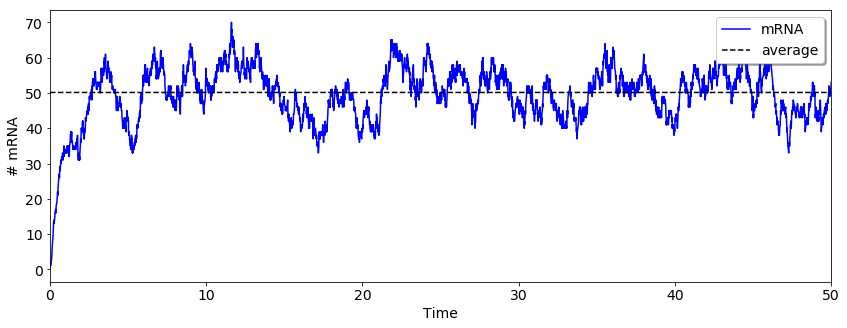

In [17]:
#PLOT the trajectory

average_line = len(mRNA_trajectory)*[np.mean(mRNA_trajectory)]
plt.rc('font', size = (14))
plt.figure(figsize=(14,5))
hfont = {'fontname':'Georgia'}
plt.plot(time_steps, mRNA_trajectory, 'b-', label='mRNA')
plt.plot(time_steps, average_line, 'k--', label='average')
plt.xlabel('Time') , plt.ylabel('# mRNA')
plt.legend(loc='upper right', shadow=True)
plt.xlim(0.0,50)
plt.show()

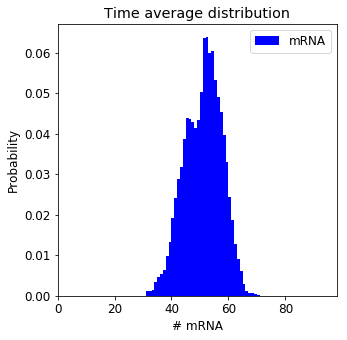

In [18]:
# PLOT the distribution using plt.hist()
plt.rc('font', size = (12))
plt.figure(figsize=(5,5))
plt.hist(mRNA_trajectory[100:], color= 'blue',normed =True,label='mRNA', bins = np.arange(max(mRNA_trajectory)*1.4));
plt.xlabel('# mRNA') , plt.ylabel('Probability')
plt.xlim(0, max(mRNA_trajectory)*1.4)
plt.legend(loc='upper right')
plt.title('Time average distribution')
plt.show()

### A feature of some stochastic process is the  <span style="color:red">**ergodicity** </span>
> 
A random process is ergodic if its <span style="color:red">**time average** </span>  is the same as its average over the probability space, known in the field of thermodynamics as its <span style="color:red">**ensemble average** </span>" (Feller, 2008)
>
> The following illustration shows 4 tarjectories of the mRNA content in 4 cells.
>
> The **probability distribution** of one cell across a window of time **recapitulate** the probability distribution of an ensable of cells in each time point.
>
> **NB** Obviusly the N of cells have to be bigger than 4 :)

<img src="Figures/ergodicity.png" style="width: 600px;"/>

><span style="color:blueviolet">**gillespie_ensemble( )** </span> is a function that has the same **core gillespie steps**, but it iterates across a large number of cells.
>
><span style="color:blueviolet">**Adapt** </span> the code above:
- <span style="color:blueviolet">**to plot** </span> in **histogram** of the ensemble distribution;
- <span style="color:blueviolet">**to calculate** </span> the **moments** (mean, variance & Fano factor);
- <span style="color:blueviolet">**to reply to the following question:** </span> is this stochatsic system **ergodic**?

In [8]:
from gillespie_ensemble_function import gillespie_ensemble
ensemble_distr = gillespie_ensemble(N_CELLS=1000, k_burst=50.0, k_deg=1.0, burst_size=1.0)

In [23]:
# ensemble_distr_mean  = ?
# ensemble_distr_var   = ?
# ensemble_distr_Fano  = ?

# *************************

# print('This is the mean of the ensemble distribution: ', ensemble_distr_mean)
# write the code to print also the other!!

# *************************

# PLOT the distribution using plt.hist()   
# You can adapt the code above, from the MENU/Edit use 'Find and Replace'
# This option will allow you to replace in the previuos code 'mRNA_trajectory' with 'ensemble_distr'!!


## **HIV cell cycle and current treatmnets** 

<img src="Figures/HIV-lifecylce.png" alt="Drawing" style="width: 400px;"/>